In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files
%matplotlib inline

            Unnamed: 0  counts  speed  std    link
0  2015-01-02 00:00:00     NaN    NaN  NaN  123007
1  2015-01-02 00:05:00     0.0    NaN  NaN  123007
2  2015-01-02 00:10:00     0.0    NaN  NaN  123007
3  2015-01-02 00:15:00     0.0    NaN  NaN  123007
4  2015-01-02 00:20:00     0.0    NaN  NaN  123007


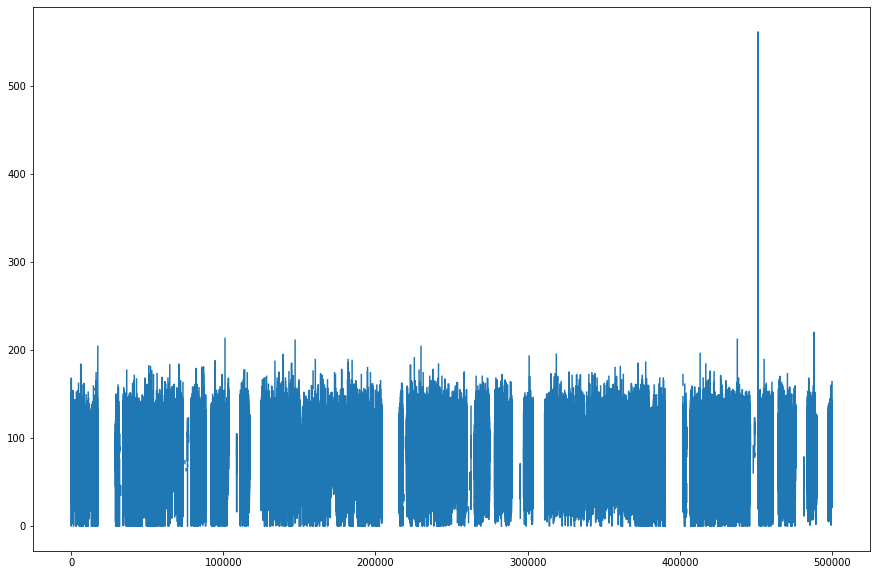

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/FCD_aggregated_half_M.csv')
print(df.head())

plt.figure(figsize=(15,10))
df['speed'].plot()

In [ ]:
df1 = df.fillna(0)

In [ ]:
Q1 = df.speed.quantile(0.1)
Q3 = df.speed.quantile(0.99)
Q1, Q3

(41.0, 138.0)

In [ ]:
IQR = Q3 - Q1
IQR

97.0

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-104.5, 283.5)

In [ ]:
df1[(df1.speed<lower_limit)|(df1.speed>upper_limit)]

,Unnamed: 0,counts,speed,std,link
451460,2015-10-02 13:40:00,1.0,561.0,0.0,125676


In [ ]:
df2 = df1[(df1.speed>lower_limit)&(df1.speed<upper_limit)]
df2

,Unnamed: 0,counts,speed,std,link
0,2015-01-02 00:00:00,0.0,0.0,0.000000,123007
1,2015-01-02 00:05:00,0.0,0.0,0.000000,123007
2,2015-01-02 00:10:00,0.0,0.0,0.000000,123007
3,2015-01-02 00:15:00,0.0,0.0,0.000000,123007
4,2015-01-02 00:20:00,0.0,0.0,0.000000,123007
...,...,...,...,...,...
499994,2016-03-19 02:10:00,2.0,123.5,28.991378,125676
499995,2016-03-19 02:15:00,0.0,0.0,0.000000,125676
499996,2016-03-19 02:20:00,1.0,164.0,0.000000,125676
499997,2016-03-19 02:25:00,1.0,107.0,0.000000,125676


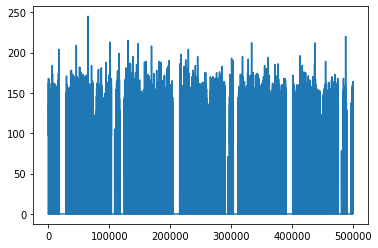

In [ ]:
df2['speed'].plot()

In [ ]:
df2.describe()

,counts,speed,std,link
count,499998.000000,499998.000000,499998.000000,499998.000000
mean,2.694533,48.633090,9.390287,31008.361873
std,4.149928,46.087065,13.310494,120771.679525
min,0.000000,0.000000,0.000000,-125678.000000
25%,0.000000,0.000000,0.000000,-125678.000000
50%,1.000000,54.000000,0.000000,123007.000000
75%,4.000000,91.000000,17.214335,125676.000000
max,85.000000,245.000000,107.480231,125676.000000


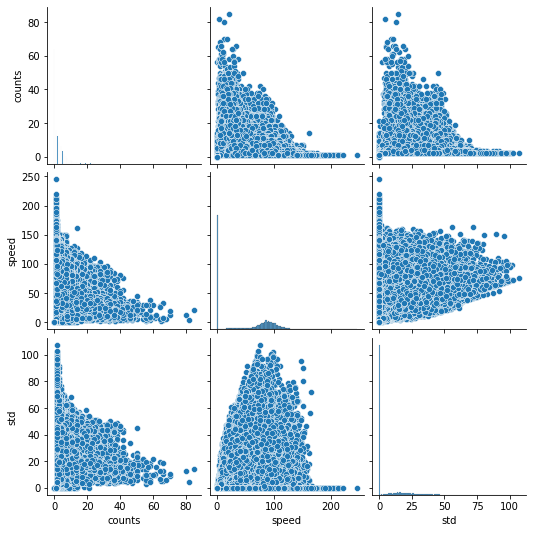

In [ ]:
import seaborn as sns

sns.pairplot(df2[['counts','speed','std']])


In [ ]:
import sklearn.cluster as cluster

kmeans = cluster.KMeans(n_clusters=3 ,init="k-means++")
kmeans = kmeans.fit(df2[['speed','counts']])

In [ ]:
df2['Clusters'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

,Unnamed: 0,counts,speed,std,link,Clusters
0,2015-01-02 00:00:00,0.0,0.0,0.0,123007,0
1,2015-01-02 00:05:00,0.0,0.0,0.0,123007,0
2,2015-01-02 00:10:00,0.0,0.0,0.0,123007,0
3,2015-01-02 00:15:00,0.0,0.0,0.0,123007,0
4,2015-01-02 00:20:00,0.0,0.0,0.0,123007,0


In [ ]:
df2['Clusters'].value_counts()

0    236184
1    134718
2    129096
Name: Clusters, dtype: int64

In [ ]:
kmeans.cluster_centers_

array([[  2.74595583,   1.26695445],
       [104.48042252,   3.0319156 ],
       [ 74.19636634,   4.95318941]])

In [ ]:
#df1.to_csv('mallClusters.csv', index = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


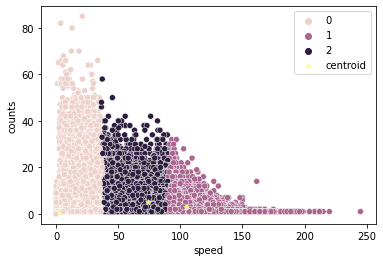

In [ ]:
sns.scatterplot(x="speed", y="counts",hue = 'Clusters',  data=df2)
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')


Elbow method

In [ ]:
import sklearn.cluster as cluster


df_Short = df2[['speed','counts']]


In [ ]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,1.070613e+09
1,2,1.223026e+08
2,3,6.740973e+07
3,4,3.767167e+07
4,5,2.484121e+07
5,6,1.825486e+07
6,7,1.442624e+07
7,8,1.196011e+07
8,9,1.024480e+07
9,10,9.014346e+06


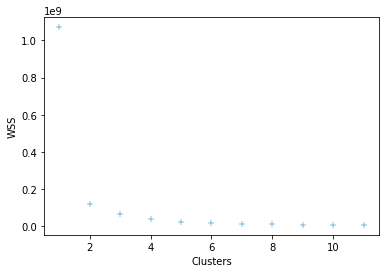

In [ ]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

#silhousette method

In [ ]:
import sklearn.metrics as metrics

In [ ]:
#for i in range(2,13):
#    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
#    print ("Silhouette score for k(clusters) = "+str(i)+" is "
#           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=100000,random_state=200)))

In [ ]:
# We will use 2 Variables for this example
kmeans1 = cluster.KMeans(n_clusters=2 ,init="k-means++")
kmeans1 = kmeans1.fit(df2[['speed','counts']])

In [ ]:
df2['Clusters'] = kmeans1.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
kmeans1.cluster_centers_

array([[ 4.07868417,  1.50235451],
       [91.17146438,  3.83276645]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


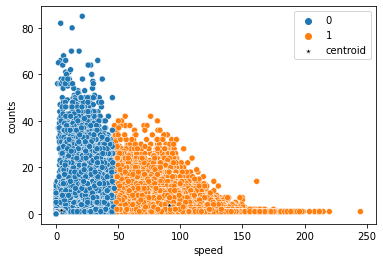

In [ ]:
sns.scatterplot(x="speed", y="counts",hue = 'Clusters',  data=df2)
sns.scatterplot(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],color='black',marker='*',label='centroid')
